## Multivariable Stability analysis

When we used proportional control on SISO systems we observed that there is usually an upper bound on the controller gain $K_c$ above which the controlled system becomes unstable. Let's investigate the equivalent calculation for MIMO systems.

In [1]:
import sympy
sympy.init_printing()
%matplotlib inline

In [2]:
s = sympy.Symbol('s')

This matrix is from example 16.2 in Seborg

In [3]:
Gp = sympy.Matrix([[2/(10*s + 1), sympy.Rational('1.5')/(s + 1)],
                   [sympy.Rational('1.5')/(s + 1), 2/(10*s + 1)]])
Gp

⎡   2           3    ⎤
⎢────────   ─────────⎥
⎢10⋅s + 1   2⋅(s + 1)⎥
⎢                    ⎥
⎢    3         2     ⎥
⎢─────────  ──────── ⎥
⎣2⋅(s + 1)  10⋅s + 1 ⎦

In [4]:
K_c1, K_c2 = sympy.symbols('K_c1, K_c2', real=True)

Unlike in SISO systems, we now have a choice of pairing. We will see that there are differences in the stability behaviour for the different pairings.

In [5]:
diagonal = True

In [6]:
if diagonal:
    Gc = sympy.Matrix([[K_c1, 0],
                       [0, K_c2]])
else:
    Gc = sympy.Matrix([[0, K_c2],
                       [K_c1, 0]])

In [7]:
I = sympy.Matrix([[1, 0],
                  [0, 1]])

The characteristic equation can be obtained from the $|I + GpGc|$. I divide by 4 here to obtain a final constant of 1 like in the example to make comparison easier. Make sure you understand that any constant multiple of the characteristic equation will have the same poles and zeros.

In [8]:
charpoly = sympy.poly(sympy.numer((I + Gp*Gc).det().cancel())/4, s)

Compare with Equation 16-20:

In [9]:
charpoly2 = sympy.poly(
    sympy.numer(
        ((1 + Gc[0,0]*Gp[0,0])*(1 + Gc[1,1]*Gp[1,1]) - Gc[0,0]*Gc[1,1]*Gp[0,1]*Gp[1,0]).cancel()
    )/4, s)

In [10]:
charpoly == charpoly2

True

Now that we have a characteristic polynomial, we can determine stability criteria using the `routh` function from `tbcontrol.symbolic`.

In [11]:
from tbcontrol.symbolic import routh

In [12]:
R = routh(charpoly)

In [13]:
R[0, 0]

All the remaining elements of the left hand row must be positive (the same sign as the first element)

In [14]:
requirements = True
for r in R[1:, 0]:
    requirements = sympy.And(requirements, r>0)

The graph below is supposed to match the textbook, but as of 2019-03-30 it does not. This appears to be a bug in `plot_implicit`.

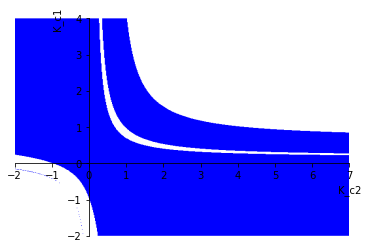

In [15]:
sympy.plot_implicit(requirements, (K_c2, -2, 7), (K_c1, -2, 4))

As an alternative, let's evaluate numerically

In [16]:
import numpy

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
f = sympy.lambdify((K_c2, K_c1), requirements)

In [19]:
nK_c2, nK_c1 = numpy.meshgrid(numpy.linspace(-2, 4, 300), numpy.linspace(-2, 7, 300))

In [20]:
r = f(nK_c2, nK_c1)

Text(0.5, 0, 'K_c2')

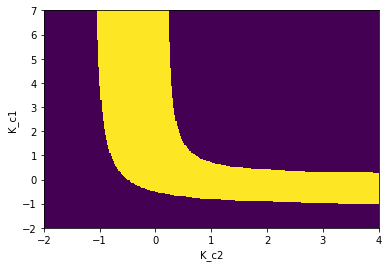

In [21]:
plt.pcolor(nK_c2, nK_c1, r)
plt.ylabel('K_c1')
plt.xlabel('K_c2')

We can see that even this simple system can exhibit more complicated behaviour than we may expect from first order systems because of the extra loops formed by the controllers.